In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

In [83]:
df_coverage_data = pd.read_csv('data/processed_data/coverage_data_processed.csv')

In [84]:
print(f"total cover mean: {df_coverage_data['total_cover'].mean()}")
print(f"total cover median: {df_coverage_data['total_cover'].median()}")
print(f"moss cover mean: {df_coverage_data['moss_cover'].mean()}")
print(f"moss cover median: {df_coverage_data['moss_cover'].median()}")
print(f"lichen cover mean: {df_coverage_data['lichen_cover'].mean()}")
print(f"lichen cover median: {df_coverage_data['lichen_cover'].median()}")



total cover mean: 0.2914285714285714
total cover median: 0.23
moss cover mean: 0.06141142857142856
moss cover median: 0.0252
lichen cover mean: 0.23001714285714278
lichen cover median: 0.1541


<Axes: xlabel='total_cover', ylabel='Count'>

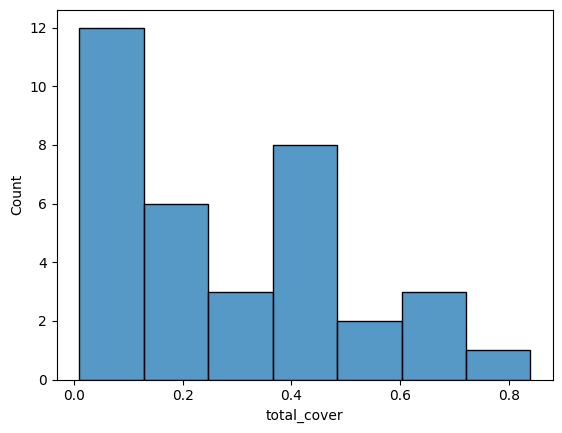

In [85]:
sns.histplot(df_coverage_data['total_cover'])

<Axes: xlabel='moss_cover', ylabel='Count'>

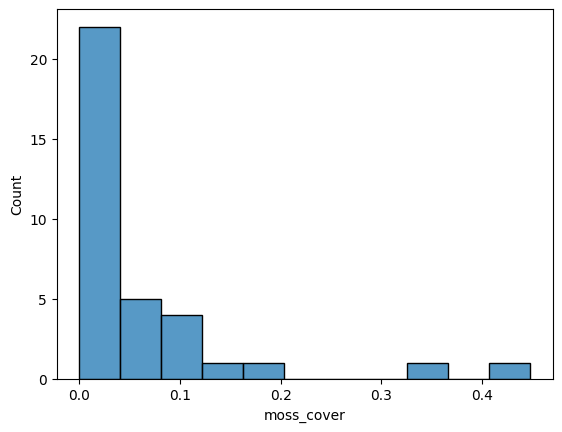

In [86]:
sns.histplot(df_coverage_data['moss_cover'])

<Axes: xlabel='deviation_north', ylabel='total_cover'>

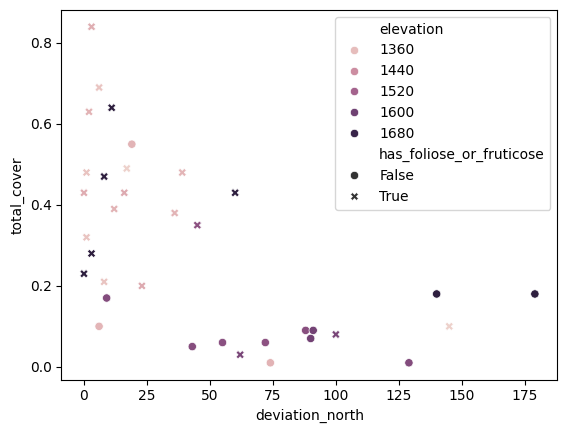

In [87]:
sns.scatterplot(df_coverage_data, x='deviation_north', y='total_cover', style='has_foliose_or_fruticose', hue='elevation')


<Axes: xlabel='deviation_north', ylabel='moss_cover'>

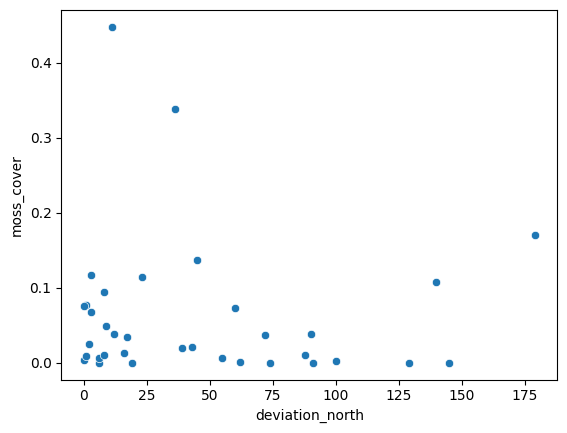

In [88]:
sns.scatterplot(x=df_coverage_data['deviation_north'], y=df_coverage_data['moss_cover'])


<Axes: xlabel='deviation_north', ylabel='lichen_cover'>

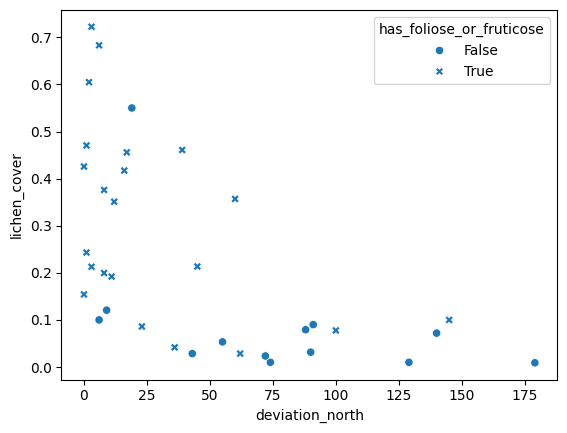

In [89]:
sns.scatterplot(df_coverage_data, x='deviation_north', y='lichen_cover', style='has_foliose_or_fruticose')


<Axes: xlabel='solar_radiation', ylabel='total_cover'>

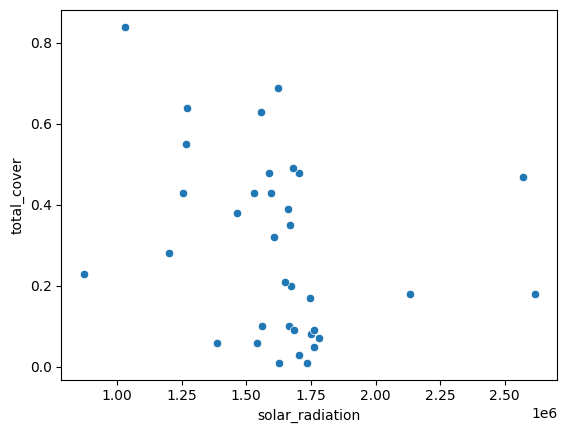

In [90]:
sns.scatterplot(df_coverage_data, x='solar_radiation', y='total_cover')

<Axes: xlabel='elevation', ylabel='total_cover'>

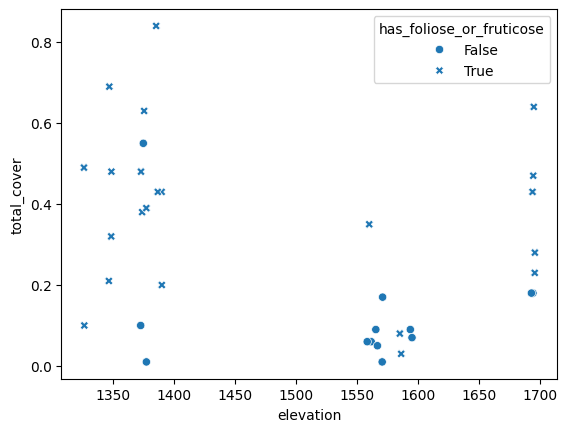

In [91]:
sns.scatterplot(df_coverage_data, x='elevation', y='total_cover', style='has_foliose_or_fruticose')

In [92]:
# I wanna look at data from each lichen species
# get all the columns that have species in them

has_species_columns = ['has_W_f', 'has_GR_c', 'has_Bl_f', 'has_R_c', 'has_Bl_c', 'has_W_fr',
    'has_O_c', 'has_W_c', 'has_Y_f', 'has_G_c']


In [93]:
# get data about the counts of all the species
species_counts = {
        column: df_coverage_data[column].sum() for column in has_species_columns
    }
print(species_counts)


{'has_W_f': np.int64(16), 'has_GR_c': np.int64(8), 'has_Bl_f': np.int64(6), 'has_R_c': np.int64(2), 'has_Bl_c': np.int64(9), 'has_W_fr': np.int64(10), 'has_O_c': np.int64(16), 'has_W_c': np.int64(35), 'has_Y_f': np.int64(1), 'has_G_c': np.int64(33)}


<Axes: >

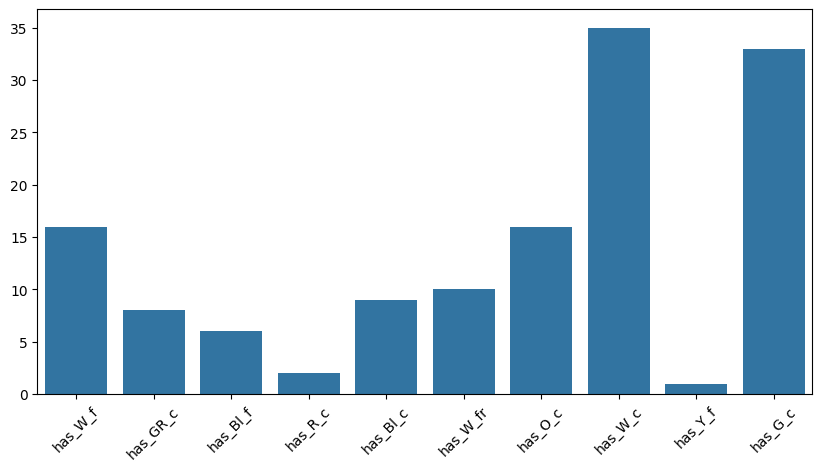

In [94]:
plt.figure(figsize=(10, 5)) 
plt.xticks(rotation=45)
sns.barplot(species_counts)

In [ ]:
# variables that I want to run statistical analysis on
vars_of_interest = ['deviation_north', 'solar_radiation']

In [ ]:
# run spearman's rank on the variables of interest, x = variable, y = total cover
for variable in vars_of_interest:
    corr, pval = spearmanr(df_coverage_data[variable], df_coverage_data['total_cover'])
    print(f'{variable} and total cover spearmanr values')
    print(f'correlation: {corr}')
    print(f'p value: {pval}')

deviation_north and total cover spearmanr values
correlation: -0.6233438868712187
p value: 6.334873313113461e-05
solar_radiation and total cover spearmanr values
correlation: -0.4187807615519921
p value: 0.012285160574063042


<Axes: xlabel='deviation_north', ylabel='rolling_var'>

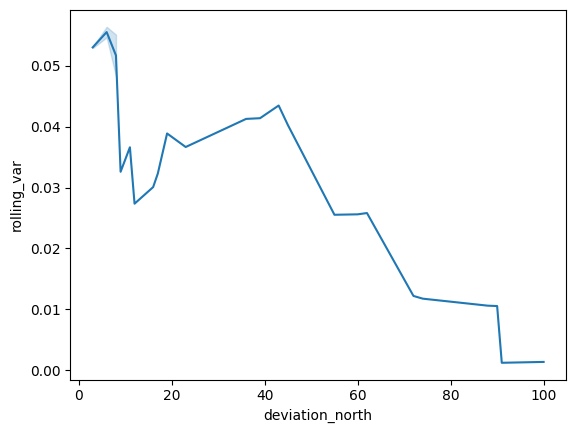

In [108]:
# plotting the variance across aspect deviation from north and total coverage
df_sorted = df_coverage_data.sort_values('deviation_north')
df_sorted['rolling_var'] = df_sorted['lichen_cover'].rolling(window=10, center=True).var()

sns.lineplot(df_sorted, x='deviation_north', y='rolling_var')

In [ ]:
# numerically check the difference in variance at certain thresholds
from scipy.stats import levene

levene_thresholds = [15, 30, 45, 60]
for threshold in levene_thresholds:
    group1 = df_coverage_data[df_coverage_data['deviation_north'] < threshold]['total_cover']
    group2 = df_coverage_data[df_coverage_data['deviation_north'] >= threshold]['total_cover']
    stat, pval = levene(group1, group2)
    print(f'''how significant is the difference in variance below and above {threshold}
          degrees away from north for total coverage''')
    print(f'p value: {pval}')

how significant is the difference in variance below and above 15
          degrees away from north for total coverage
p value: 0.5533478219078445
how significant is the difference in variance below and above 30
          degrees away from north for total coverage
p value: 0.20461584423374274
how significant is the difference in variance below and above 45
          degrees away from north for total coverage
p value: 0.04812215838029011
how significant is the difference in variance below and above 60
          degrees away from north for total coverage
p value: 0.02170896409162583
